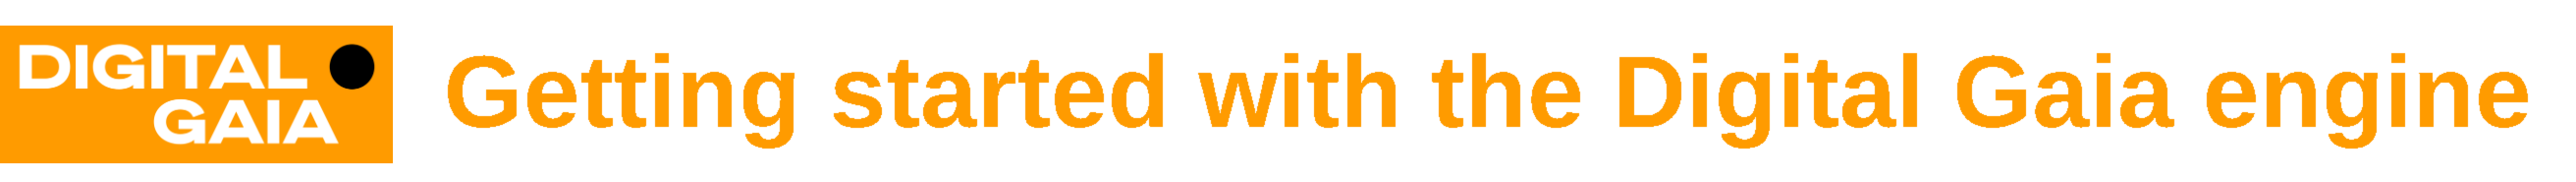

## <u>Table of contents:</u>

**1. General information**<br/>
&emsp;&emsp; 1.1. The project's configuration file<br/>
&emsp;&emsp; 1.2. The format of report files<br/>
&emsp;&emsp; 1.3. The ontology<br/><br/>
**2. The high level interface of the Digital Gaia engine**<br/>
&emsp;&emsp; 2.1. Import and setup of required packages <br/>
&emsp;&emsp; 2.2. Loading the data and creating agents <br/>
&emsp;&emsp; 2.3. Performing predictions and visualising the results <br/>
&emsp;&emsp; 2.4. Performing inference and visualising the results <br/><br/>
**3. Creating a custom agent**<br/>
&emsp;&emsp; 3.1. The generative model and variational distribution<br/>
&emsp;&emsp; 3.2. The agent interface<br/>
&emsp;&emsp; 3.3. The code of the custom agent<br/>
&emsp;&emsp; 3.4. Visualising the custom agent<br/>

## 1. General information

This notebook explains how to use the Digital Gaia engine. The engine's goal is to evaluate a project (e.g., an agricultural or reforestation project) based on different metrics such as: its impact on the environment, its expected yield, ...

Each project needs a configuration file, the convention is to use the following path format: 

```
    ./data/projects/<company_or_association_name>/<project_name>.json
```
For example, if the company is `Google` and their project is called `AmazonReforestation`, we get the following:
```
    ./data/projects/Google/AmazonReforestation.json
```

## 1.1. The project's configuration file

This section describes the format of a project's configuration files, e.g., `./data/projects/Tutorial/GetStarted.json`.

The configuration file defines the project's name, its starting date, and its duration in years as follows:

```json
{
	"name": "Tutorial.GetStarted",
	"start_date": "2021-12-01",
	"duration_in_years": 1,
    ...
}
```

The configuration file also defines the strategies available to the agents. Each strategy has a name, and requires the agent to support a set of interventions and plant species. Additionally, each strategy has its own objective that defines which variable(s) are relevant to the project's goal. Finally, each strategy defines the sequence of actions that the agent should perform when following this strategy. A simple strategy could be defined like that: 

```json
{
    ...
	"strategies": [{
        "name": "demo_policy",
        "species": [
            "v1.genetics.base.plant.Plant.PlantSpecies.Hemp",
        ],
        "interventions": {
            "planting-hemp": "v1.management.base.agriculture.Planting.PlantingSeeds.HempSeeds",
            "harvest-hemp": "v1.management.base.agriculture.Harvest.HarvestCrops.Hemp",
        },
        "objective": {
            "target_variable": "v1.measurement.base.agriculture.Yield.HempYield.Continuous",
            "aggregator": "sum",
            "constraints": []
        },
        "policy": [
            [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],
            ["planting-hemp"], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ["harvest-hemp"],
            [], [], [], [], [], [], [], [], [], [], []
        ]
    }]
}
```

The last part of the configuration file defines the project's lots. A lot corresponds to an area on which a strategy is deployed. Each lot has a name, a boundary (also refered to as bounds), as well as an associated strategy. Additional, information about the lot can be stored in the `geo_params` field, e.g., the soil type, the climate zone, the average slope and average annual rainfall. A simple lot can be defined as follows:

```json
{
    ...
	"lots": [{
		"name": "lot_0",
        "bounds": {
            "type": "Polygon",
            "coordinates": [[
                [-89.56672668457031, 45.101638366018676],
                [-89.56672668457031, 45.09295909075445],
                [-89.55780029296875, 45.09295909075445],
                [-89.55780029296875, 45.101638366018676],
                [-89.56672668457031, 45.101638366018676]
            ]]
        },
        "strategy": "demo_policy",
        "geo_params": {
            "soil_type": {"type": "LV-stn.abm-ai.ct.lon.oh.sia", "taxonomy": "<url>"},
            "climate_zone": {"type": "Dfa", "taxonomy": "<url>"},
            "avg_slope": {"slope_pct": 0.05, "heading_deg": 180.0},
            "avg_annual_rainfall": {"mm_m2": 12345}
        }
	}],
    ...
}
```

## 1.2. The format of report files 

Reports are stored on the filesytem as JSON files. The name of each report file contains the date at which the report was received by Digital Giai, as well as a unique index that differentiate this report from other reports, e.g., `./data/reports/report-2021-12-15.2696cd6c-ab30-44af-ac80-de336152526a.json`. <br/>

Each report file contains information describing a set of observations made by one of Digital Gaia's partners. Moreover, each report file contains the location and date describing where and when the measurement was made, as well as the report's unique index. Finally, each report can contain additional information such as: 
- the name of the project for which the measurements were performed
- the email of the person who provided Digital Gaia with the report
- a URL describing the provenance of the data
- a set of URLs pointing to evidence supporting the observations contained in the report <br/>

An example of a simple report could look like this:

```json
{
  "id": "2696cd6c-ab30-44af-ac80-de336152526a",
  "datetime": "2021-12-15",
  "location": {
    "coordinates": [-89.56181335449219, 45.096866607666016],
    "type": "Point"
  },
  "project_name": "Tutorial.GetStarted",
  "reporter": "tuto@gmail.com",
  "provenance": "<url>",
  "observations": [{
      "name": "v1.measurement.base.agriculture.Yield.HempYield.Continuous",
      "value": [19.374610900878906]
    }
  ],
  "evidence": []
}
```

## 1.3. The ontology

The ontology is a structured representation of the concepts used by the models of the Digital Gaia engine. The ontology is structured as follows:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font color=red>&lt;version&gt;</font>.<font color=darkorange>&lt;variable_type&gt;</font>.<font color=goldenrod>&lt;namespace&gt;</font>.<font color=green>&lt;domain&gt;</font>.<font color=blue>&lt;concept&gt;</font>.<font color=purple>&lt;variable&gt;</font>.<font color=hotpink>&lt;unit_or_category&gt;</font>

For example:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font color=red>&lt;v1&gt;</font>.<font color=darkorange>&lt;Management&gt;</font>.<font color=goldenrod>&lt;Base&gt;</font>.<font color=green>&lt;Agriculture&gt;</font>.<font color=blue>&lt;Harvest&gt;</font>.<font color=purple>&lt;HarvestCrops&gt;</font>.<font color=hotpink>&lt;Categorical&gt;</font>

A table documenting the currently supported entries of the ontology is available [here](https://github.com/gaia-os/natural_models/blob/feature/adding-get-started/src/natural_models/ontology/documentation/ontology_doc.pdf).

### 1.3.1. Variable types

The first version of the ontology will includes the following variable types:
- <font color=darkorange>&lt;genetics&gt;</font> (for information conserning plant species and vegetation types, e.g., forest, grassland, ...)
- <font color=darkorange>&lt;environment&gt;</font> (notably the weather)
- <font color=darkorange>&lt;management&gt;</font> (also known as actions, treatments or practices)
- <font color=darkorange>&lt;measurement&gt;</font> (also known as observables or observations)
- <font color=darkorange>&lt;society&gt;</font> (societal factors that can impact biological outcomes)
- <font color=darkorange>&lt;outcome&gt;</font> (colloquially sometimes called targets or state variables)
- <font color=darkorange>&lt;parameter&gt;</font> (the parameter encoding real world properties, e.g., plant growth rates, ...)

However, the current version of the ontology is still an alpha that contains the following variable types: shock, intervention, vegetation, and measurement. While the parameter and outcome types will be added soon.

### 1.3.2. Namespaces

A namespaces provide a way to differentiate between two entries that would otherwise be the same. This is useful as different associations or companies may use the same name for slightly different practices. The namespace <font color=goldenrod>&lt;base&gt;</font> is special as it represents Digital Gaia's namespace, and contains general concepts that are widely used throughout the network of famers and modelers.

### 1.3.3. Domains

A domain represents specified sphere of activity or knowledge, for example: <font color=green>&lt;agroforestry&gt;</font>, <font color=green>&lt;agriculture&gt;</font>, <font color=green>&lt;forestry&gt;</font>, and <font color=green>&lt;aquaculture&gt;</font>, are all domains. This level of the ontology allows the separation of concepts and variables across domains. For example, the number of plant species is enormous, but separating them into domains helps enumerating them in the ontology.

### 1.3.4. Concepts and Variables

A concept represent an abstract idea such as for example: <font color=blue>&lt;plant density&gt;</font>, <font color=blue>&lt;irrigation&gt;</font> or <font color=blue>&lt;fertiliser&gt;</font>. Concepts are just above variables in the hierarchy, and the variables represent specific instances of these abstract concepts. For example, <font color=purple>&lt;hemp density&gt;</font> and <font color=purple>&lt;alfalfa density&gt;</font> could be instances of <font color=blue>&lt;plant density&gt;</font>.

### 1.3.5. Units or categories

Finally, the lowest level in the ontology represents units or categories. Categories of <font color=purple>&lt;plant species&gt;</font> could be: <font color=hotpink>&lt;hemp&gt;</font>,  <font color=hotpink>&lt;copaiba&gt;</font> and <font color=hotpink>&lt;brazil nut&gt;</font>, while units would be: <font color=hotpink>&lt;kg&gt;</font>, <font color=hotpink>&lt;km&#xB2;&gt;</font> and <font color=hotpink>&lt;L&gt;</font>. However, the units are still work in progress, and for now, if a variable is not a category it can only be <font color=hotpink>&lt;continuous&gt;</font>.


# 2. The high level interface of the Digital Gaia engine

## 2.1. Import and setup of required packages

Before to run the following block, you need to set an environment variable called `DG_NATURAL_MODELS_ROOT_OF_REPOSITORY`.

On Linux and Mac OS, this is done running the following in a terminal:
```
    export DG_NATURAL_MODELS_REPOSITORY=<path_to_digital_gaia_natural_models_repository>
```

If the project is in your desktop, the path should looks like this:
```
    /home/<username>/Desktop/natural_models
```

Note, you may need to restart the notebook.

In [1]:
# Import required packages
import os
import sys
import matplotlib.pyplot as plt
import jax.numpy as jnp
from numpyro.optim import optax_to_numpyro
from numpyro.infer import Trace_ELBO
import optax
from numpyro import set_platform

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Allow notebook to see the natural_models package
module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Tell numpyro whether to use cpu or gpu
use_gpu = False
if use_gpu is True:
    set_platform('gpu')
else:
    set_platform('cpu')

# Import required classes from the open_science_network package
from open_science_network.agents.AgentFactory import AgentFactory
from open_science_network.assessment.DataLoader import DataLoader
from open_science_network.kernels.impl.MCMCKernel import MCMCKernel
from open_science_network.kernels.impl.SVIKernel import SVIKernel
from open_science_network.visualisation.distributions import draw_beliefs
from open_science_network.visualisation.distributions import compare_posteriors

/home/theophile/Desktop/GitHub/digital_gaia/open-science-network/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2.2. Loading the data and creating agents

### 2.2.1. Loading the data

The class responsible for loading the data from the filesystem is called: `DataLoader`.

It requires the path to the project's configuration file, and provide access to: lots information, available reports, policy to evaluate, etc...

In [2]:
# Load the data corresponding to the Roots & Culture model
data_loader = DataLoader('../data/projects/Roots-and-Culture/roots-indoor1.json')

### 2.2.2. Creating compatible agents

The class responsible for instantiating the agents compatible with the project configuration file is called: `AgentFactory`.

All compatible agents can be retrieved by calling the method `AgentFactory.create`, and providing the data loader as parameter.

Specific agents can be recovered using their unique names, e.g., the deterministic model of Roots & Culture is called:
```
    Roots-and-Culture.roots-indoor1.Deterministic
```

In [3]:
# Load the agents agent(s) compatible with the loaded data
agents = AgentFactory.create(data_loader, verbose=True)

# Get ordinary differential equations
agent = next(filter(lambda a: a.name == "Roots-and-Culture.roots-indoor1.Deterministic", agents))

[INFO] Agents found:
[INFO] 	- <class 'open_science_network.agents.impl.get_started_agent.GetStartedAgent'>
[INFO] 	- <class 'open_science_network.agents.impl.roots_agent.DeterministicRootsAndCultureAgent'>
[INFO] 	- <class 'open_science_network.agents.impl.roots_agent.StochasticRootsAndCultureAgent'>
[INFO] 
[INFO] Project interventions:
[INFO] 	- v1.management.base.agriculture.Pesticide.SpreadPesticide.Yes
[INFO] 	- v1.management.base.agriculture.BioChar.UseBioChar.Yes
[INFO] 	- v1.management.base.agriculture.Pruning.PruneCrops.Yes
[INFO] 	- v1.management.base.agriculture.VermiCompost.UseVermiCompost.Yes
[INFO] 	- v1.management.base.agriculture.Harvest.HarvestCrops.Hemp
[INFO] 	- v1.management.base.agriculture.Harvest.HarvestCrops.Alfalfa
[INFO] 	- v1.management.base.agriculture.Fertilizer.FertilizeSoil.No
[INFO] 	- v1.management.base.agriculture.Planting.PlantingSeeds.HempSeeds
[INFO] 	- v1.management.base.agriculture.Irrigation.IrrigateCrops.Yes
[INFO] 	- v1.management.base.agricul

StopIteration: 

## 2.3. Performing predictions and visualising the results

### 2.3.1. Performing predictions

The agent class provides a method called `predict` that calls the `Predictive` numpyro class, and performs prediction into the future based on the policy described in the project configuration.

The `predict` function takes as paramters the agent's model that is used to perform prediction into the future. This function returns samples from the distribution over future random variables, and the number of samples returned for each variable can be specified as parameter. 

In [ ]:
# Predict the future using the deterministic agent
prediction_samples = agent.predict(model=agent.model, num_samples=1)

### 2.3.2. Visualising the predictions

Let's call the function in charge of displaying the beliefs. This function takes as parameter the predictive samples: 

In [ ]:
# Draw prior beliefs using the predictive samples
fig = draw_beliefs(prediction_samples)

## 2.4. Performing inference and visualising the results

### 2.4.1. Performing inference

First, let's provide the agent with the data and policy that it should use to perform inference.

In [ ]:
# Provide the policy to the deterministic agent
agent.policy = agent.policy[:, -1:]

# Provide the data to the deterministic agent
data = {
    'lai': prediction_samples['lai'][0]
}
cond_model, cond_guide = agent.condition_all(data=data)

 Second, let's create the mask specifying which observations are provided to the model:

In [ ]:
# The measurement interval is the number of time steps between two observations made by the agent 
measurement_interval = 2

# Create the mask
mask = {
    'lai': jnp.expand_dims(jnp.arange(len(data['lai'])), -1) % measurement_interval == 0
}

Third, let's run inference using Monte Carlo Markov Chain (MCMC):

In [ ]:
# Create the MCMC algorithm
mcmc_args = {
    "num_warmup": 1000,
    "num_samples": 1000, 
    "num_chains": 1
}
mcmc_algorithm = agent.inference_algorithm(MCMCKernel, kernel_args=mcmc_args)

# Perform inference using MCMC
inference_args = {
    "mask": mask,
    "data_level": 0
}
mcmc_samples = mcmc_algorithm.run_inference(inference_args=inference_args)

Fourth, let's run inference using Stochastic Variational Inference (SVI):

In [ ]:
# Create the SVI algorithm
svi_args = {
    "optimiser": optax_to_numpyro(optax.adabelief(1e-3, eps=1e-8, eps_root=1e-8)),
    "loss": Trace_ELBO(num_particles=10)
}
svi_algorithm = agent.inference_algorithm(SVIKernel, kernel_args=svi_args)

# Perform inference using SVI
inference_params = {
    "stable_update": True, 
    "mask": mask,
    "data_level": 0
}
prediction_params = {
    "num_step": 20000
}
svi_samples = svi_algorithm.run_inference(inference_params=inference_params, prediction_param=prediction_params)

### 2.4.2. Visualising the posterior beliefs

Let's call the function in charge of comparing the initial predictions and the posterior distributions, i.e., MCMC and SVI posteriors:   

In [ ]:
# Compare the initial prediction, the SVI posterior, and the MCMC posterior
fig = compare_posteriors(
    is_observed=mask['lai'],
    mcmc_samples=mcmc_samples,
    svi_samples=svi_samples,
    prediction_samples=prediction_samples
)

## 3. Creating a custom agent

This section describes how to create a custom agent compatible with the Digital Gaia engine. An agent is composed of two main components, i.e., a generative model and a variational distribution. To keep the agent simple, we consider a model with only one parameter $\theta \in \mathbb{R}^+$ that represents the growth rate of hemp. The model contains only two hidden variables at each time step $\tau$, i.e., the hemp size $s_\tau \in \mathbb{R}^+$ and whether the hemp can grow $g_\tau \in \{0, 1\}$. Additionally, the only observed variable in the model is the yield denoted $y_\tau \in \mathbb{R}^+$. Finally, the agent can take two actions, i.e., planting is denoted $p_\tau \in \{0, 1\}$ and harvesting is denoted $h_\tau \in \{0, 1\}$.

Note, the agent is provided with measurement of the yield for time steps between the initial time step, i.e., $\tau = 0$, and the present time step, i.e., $\tau = T$. Additionally, given any random variable $x_\tau$, the set of all $x_\tau$ in the past and present is denoted $\tilde{x} = \{x_0, ..., x_T\}$. For example, $\tilde{y} = \{y_0, ..., y_T\}$ represents all the yield measurements collected up to now, $\tilde{s} = \{s_0, ..., s_T\}$ represents the hemp size at all time steps in the past and present, and $\tilde{h} = \{h_0, ..., h_T\}$ describes the time steps at which the hemp was harvested.

## 3.1. The generative model and variational distribution

Note that understanding this section fully is not required for creating custom agents. However, having an idea of what a generative model and a variational distribution is, will helpful when we start coding.

### 3.1.1. The generative model

Let's now focus on the definition of the generative model, which is a Partially Observable Markov Decision Process (POMDP). In this section, a POMDP is a 4-tuple denoted $\mathcal{P} = (\mathcal{O}, \mathcal{S}, \mathcal{A}, \mathcal{\Phi})$, where $\mathcal{O} = \tilde{y}$ are the measurements of the model, $\mathcal{S} = \tilde{s} \cup \tilde{g}$ are the states of the model, $\mathcal{A} = \tilde{p} \cup \tilde{h}$ are the actions of the model, and $\mathcal{\Phi} = \{\theta\}$ are the model paramters. Moreover, a POMDP restricts the flexibility of the model by imposing constraints on its structure.

For example, $\mathcal{P}$ assumes that the measurement at time step $\tau$ depends only on the states at time step $\tau$, i.e., $P(y_\tau | g_\tau, s_\tau)$, while the states at time step $\tau + 1$ can depend on the states and actions at time step $\tau$ as well as on the parameters, i.e., $P(g_{\tau + 1} | g_\tau, h_\tau, p_\tau)$ and $P(s_{\tau + 1}| s_\tau, g_\tau, h_\tau, \theta)$. Lastly, the parameters and the initial states does not depend on any other random variables, i.e., $P(\theta)$, $P(g_0)$ and $P(s_0)$. Putting everything together, the generative model is defined as:
$$
P(\tilde{y}, \tilde{g}, \tilde{s}, \theta | \tilde{h}, \tilde{p}) \quad\quad = \underbrace{P(\theta)P(g_0)P(s_0)}_{\text{prior over initial states and parameter}} \quad \prod_{\tau = 0}^{T} \underbrace{P(y_\tau | s_\tau, h_\tau)}_{\text{likelihood mapping}} \quad \prod_{\tau = 0}^{T - 1} \underbrace{P(g_{\tau + 1} | g_\tau, h_\tau, p_\tau)P(s_{\tau + 1}| s_\tau, g_\tau, h_\tau, \theta)}_{\text{transition mapping}}.
$$

While the above equation defines the structure of the model, it does not define the exact probability distributions used for each factor. In this section, the uncertainty of about the hemp growth rate is modelled as a Gamma distribution, i.e., $P(\theta) = \text{Gamma}(\theta; 3, 0.06)$, whose concentration and rate parameters are equal to 3 and 0.06, respectively. Intuitively, since the mean of this Gamma distribution is around 50 millimeters, it means that the model believes that the hemp is growing by 5 centimeters every week.

Moreover, the uncertainty about the initial size of the hemp is modelled as a Gamma distribution, i.e., $P(s_0) = \text{Gamma}(s_0; 1, 0.1)$, whose concentration and rate parameters are equal to 1 and 0.1, respectively. This corresponds to an average height of 10 millimeters, and encodes the fact that initially there is no hemp present in the field, and the expected plant height is very close to zero. 

In addition, the uncertainty about whether the hemp can grow at time step zero is modelled as a Bernoulli distribution, i.e., $P(g_0) = \text{Bernoulli}(g_0; 0.05)$, where the hemp can grow with a probability of 0.05. In other words, the hemp can grow at time step zero with 5% chance.

Now let's focus on the definition of the transition and likelihood mappings. The model assumes that the hemp size will remain the same if it cannot grow, i.e., $g_{\tau - 1} = 0$, otherwise the hemp will grow according to the growth rate $\theta$. For example, if $\theta$ is equal to 48, then the hemp will grow by 48 millimeters. Additionally, if the farmer harvested the field at time step $\tau$, the hemp size at time $\tau + 1$ will be zero. This behaviour can be expressed as follows:

$$P(s_{\tau + 1}| s_\tau, g_\tau, h_\tau, \theta) = \begin{cases}
1 & \text{if } s_{\tau + 1} = (s_\tau + \theta \times g_\tau) \times (1 - h_\tau)\\
0 & \text{otherwise} 
\end{cases}.$$

Next, the hemp can grow if it was able to grow at the previous time step, except if the farmer decided to harvest. Furthermore, the hemp can grow if it was not able to grow at the previous time step, but the farmer decided to plant some seed in the field. In other words:

$$P(g_{\tau + 1} | g_\tau, h_\tau, p_\tau) = \begin{cases}
1 & \text{if } g_{\tau + 1} = g_\tau \times (1 - h_\tau) + (1 - g_\tau) \times p_\tau\\
0 & \text{otherwise} 
\end{cases}.$$

Lastly, the yield is zero except when the farmer is harvesting the crop, in this case, it is equal to the hemp size just before the harvest. Formally, we have:

$$P(y_\tau| s_\tau, h_\tau) = \begin{cases}
1 & \text{if } y_\tau = s_\tau \times h_\tau\\
0 & \text{otherwise} 
\end{cases}.$$

### 3.1.2. The variational distribution

In the previous section, we defined the generative model $P(\mathcal{O}, \mathcal{S}, \mathcal{\Phi} | \mathcal{A})$. Give some measurements $\mathcal{O}$, we would like to update our beliefs about the states of the world. The process of updating our beliefs about the world to account for new data is called inference. More formally, the goal is to compute the posterior distribution, i.e.,

$$\underbrace{P(\mathcal{S}, \mathcal{\Phi} | \mathcal{O}, \mathcal{A})}_{\text{true posterior}} \propto \underbrace{P(\mathcal{O}, \mathcal{S}, \mathcal{\Phi} | \mathcal{A})}_{\text{generative model}}.$$

Unfortunatly, computing the posterior requires marginalising the generative model over the hidden variables of the model (i.e., $\mathcal{S}$, and $\mathcal{\Phi}$). When $\mathcal{S}$ is continuous then marginalising implies solving some integrals. In general, the marginalisation is intractable or too computationally expansive. Instead, we approximate the true posterior with a variational distribution:

$$\underbrace{Q(\mathcal{S}, \mathcal{\Phi} | \mathcal{A})}_{\text{variational posterior}} \,\approx \quad \underbrace{P(\mathcal{S}, \mathcal{\Phi} | \mathcal{O}, \mathcal{S})}_{\text{true posterior}}.$$

Then, we minimise the distance between the variational posterior and true posterior. The Kullback-Leibler divergence is a frequently used quantity that measures how different two distribution are. Thus, the optimisation problem is given by: 
$\newcommand{\kl}[2]{D_{\mathrm{KL}} \left[ \left. \left. #1 \right|\right| #2 \right]}$ $\DeclareMathOperator*{\argmin}{arg\,min}$

$$Q^*(\mathcal{S}, \mathcal{\Phi} | \mathcal{A}) = \argmin_{Q(\mathcal{S}, \mathcal{\Phi} | \mathcal{A})} \kl{Q(\mathcal{S}, \mathcal{\Phi} | \mathcal{A})}{P(\mathcal{S}, \mathcal{\Phi} | \mathcal{O}, \mathcal{A})}$$

Minimising the above Kullback-Leibler divergence is equivalent to minimising the variational free energy defined as follows:

$$\mathcal{F}\big[Q(\mathcal{S}, \mathcal{\Phi} | \mathcal{A}), \mathcal{O}\big] = \underbrace{\kl{Q(\mathcal{S}, \mathcal{\Phi} | \mathcal{A})\,}{P(\mathcal{S}, \mathcal{\Phi} | \mathcal{A})}}_{\text{complexity}} - \underbrace{\mathbb{E}_{Q(\mathcal{S}, \mathcal{\Phi})}\big[\ln P(\mathcal{O} | \mathcal{S}, \mathcal{\Phi})\big]}_{\text{accuracy}}$$

Intuitively, the variational free energy is composed of two terms. The accuracy describes how well the measurements are predicted by the likelihood mapping $P(\mathcal{O} | \mathcal{S}, \mathcal{\Phi})$, while the complexity quantifies how far the posterior $Q(\mathcal{S}, \mathcal{\Phi} | \mathcal{A})$ is from the prior $P(\mathcal{S}, \mathcal{\Phi} | \mathcal{A})$. Thus, the complexity can be see as a regularisation term that keeps the variational posterior as close as possible to the prior, while the accuracy pull the posterior away from the prior to achieve good predictions.

There are different ways to defines the variational posterior. One of them is to assume that the variational distribution is distributed according to a Gaussian distribution, i.e., $Q(\mathcal{S}, \mathcal{\Phi} | \mathcal{A}) = \mathcal{N}(\mathcal{S}, \mathcal{\Phi}; \boldsymbol{\mu}, \boldsymbol{\Sigma})$. Fortunatly, Numpyro provides an easy to use Gaussian posterior, and we use it in the following sections.  

## 3.2. The agent interface

### 3.2.1. Inheritance and custom functionalities

The agent interface is key to the creation of new agents. It is an abstract class from which all agents need to inherit if they want to be compatible with the Digital Gaia engine. The two main methods that needs to be implemented by new agents are the `model` and `guide`. As their name sugguests it is where the code of the generative model and variational distribution goes. The `model` is defined as follows:

```python
@abc.abstractmethod
def model(self, *args, **kwargs):
    """
    Getter
    :param args: the model's arguments
    :param kwargs: the model's keyword arguments
    :return: the model
    """ 
    ...
```
All models takes a list of arguments as well as a dictionary of keyword arguments as parameters. The keyword arguments are the arguments whose name are provided when calling the function. e.g., `agent.model(arg_1, arg_2, name_1=kwarg_1, name_2=kwarg_2)`. The `guide` is defined very similarly:
```python
@abc.abstractmethod
def guide(self, *args, **kwargs):
    """
    Getter
    :param args: the guide's arguments
    :param kwargs: the guide's keyword arguments
    :return: the guide
    """ 
    ...
```
All guides takes a list of arguments as well as a dictionary of keyword arguments as parameters.






```python
@abc.abstractmethod
def set_time_horizon(self, t):
    """
    Set the new time horizon
    :param t: the new time horizon
    """ 
    ...
```

```python
@abc.abstractmethod
def add_reports(self, reports):
    """
    Provide new reports to the model
    :param reports: the new reports
    """ 
    ...
```

### 3.2.2. Out-of-the-box functionalities

In the previous section, we described the functionalities that a developer needs to implement for an agent to be compatible with the Digital Gaia engine. However, the agent interface provides out-of-the-box features. For example, a common task is to perform prediction about the future based on the agent's model. The agent interface exposes a method called `predict` that uses Numpyro's `Predictive` class to do exactly that:
```python
def predict(self, **kwargs):
    """
    Perform prediction
    :param kwargs: keyword parameters to send to the "Predictive" class
    :return: the predictions
    """ 
    self.rng_key, rng_key_ = random.split(self.rng_key)
    prior_predictive = Predictive(**kwargs)
    return prior_predictive(rng_key_)
```

Moreover, while by default the agent is performing the sequence of actions described in the project's configuration file, one may want to estimate the quality of a custom policy. The default policy can be retrieved using the following getter:
```python
@property
def policy(self):
    """
    Policy getter
    :return: the agent's policy
    """ 
    return self.data.policy
```

In practice, this getter can be called like this: `current_policy = agent.policy`. Similarly, a custom policy can be set using the following setter: 
```python
@policy.setter
def policy(self, new_policy):
    """ 
    Policy setter
    :param new_policy: the new policy the agent should follow
    """
    self.data.policy = new_policy
    self.set_time_horizon(new_policy.shape[0])
```

In practice, this getter can be called like this: `agent.policy = custom_policy`. Also, when performing inference, it is required to provide the agent with some measurments. This can be done using `condition_model`, `condition_guide`, and `condition_all`. As the name suggests, `condition_model` provides the data to the agent's model. Technically, this is done by using Numpyro's conditioning handler as follows:
```python
def condition_model(self, data):
    """
    Condition the model on some data
    :param data: the data
    :return: the conditioned model
    """
    # Ensure the time horizon always correspond the length of the action sequence
    if "event" in data.keys():
        self.set_time_horizon(data["event"].shape[0])

    # Condition the model on the data
    self.conditioned_model = numpyro.handlers.condition(self.model, data=data)
    return self.conditioned_model
```

When performing variational inference, the data also needs to be provided to the variational distribution. Similarly to `condition_model`, the function `condition_guide` provides the data to the agent's guide using Numpyro's conditioning handler:
```python
def condition_guide(self, data):
    """
    Condition the guide on some data
    :param data: the data
    :return: the conditioned guide
    """ 
    # Ensure that the agent has implemented the variational distribution
    if self.guide is None:
        return None

    # Condition the variational distribution on the data
    self.conditioned_guide = numpyro.handlers.condition(self.guide, data=data)
    return self.conditioned_guide
```

Additionally, it is a bit tedious to call both the `condition_model` and `condition_guide` functions each time we want to provide the data to both the model and the guide. The method `condition_all` solves this problem by calling both functions:
```python
def condition_all(self, data):
    """
    Condition the model and the guide on some data
    :param data: the data
    :return: the conditioned model and guide
    """ 
    self.condition_model(data)
    self.condition_guide(data)
    return self.conditioned_model, self.conditioned_guide
```

After providing the data to the agent, we need to retrieve the inference algorithm and use it to compute the posterior beliefs. The agent interface has a method called `inference_algorithm` that returns the inference algorithm. By default, it creates a stochastic variational inference (SVI) kernel. However, any kernel can be provided as parameter, i.e.,
```python
def inference_algorithm(self, kernel=None, **kwargs):
    """
    Getter
    :param kernel: the kernel to use, by default the SVIKernel will be used
    :param kwargs: additional parameters that must be passed to the kernel
    :return: the inference algorithm to use
    """ 
    # Retrieve the most informed model
    model = self.model if self.conditioned_model is None else self.conditioned_model
    
    # Create the default inference algorithm
    if kernel is None:
        return SVIKernel(name=self.name, model=model, guide=self.conditioned_guide, **kwargs)

    # Create the inference algorithm requested by the user
    return kernel(name=self.name, model=model, guide=self.conditioned_guide, **kwargs)
```

Once the kernel is retrieved using `kernel = agent.inference_algorithm()`, inference can be performed by calling the following function:
```python
@abc.abstractmethod
def run_inference(self, *args, **kwargs):
    """ 
    Compute posterior beliefs
    :return: samples from the posterior distribution
    """
    ...
```

This above function computes the posterior beliefs, and returns samples from the associated posterior distribution. 

## 3.3. The code of the custom agent

#### <ins> TODO </ins> 

## 3.4. Visualising the custom agent

First, let's load the data and the custom agent:

In [ ]:
# Load the data corresponding to the GetStarted model
data_loader = DataLoader(f'{root_dir}/data/projects/Tutorial/GetStarted.json')

# Load the agent(s) compatible with the loaded data, and retrieve the GetStarted agent
agents = AgentFactory.create(data_loader)
agent = next(filter(lambda a: a.name == "Tutorial.GetStarted", agents))

Second, let's perform predictions about the future:

In [ ]:
# Predict the future using the GetStarted agent
prediction_samples = agent.predict(model=agent.model, num_samples=1)

Third, we visualise the results, and this time, we need to specify the variables to display in each subfigure. Each subfigure contains two variables, and the second variable may be a measurement of the first variable. The function `draw_beliefs` takes four parameters:
- `samples` are the samples used to draw each subfigure
- `var_1` is a dictionary whose keys are the sample sites' names for the first variable of each subfigure, and the values are the labels (in the legend) for the first variable of each subfigure
- `var_2` is a dictionary whose keys are the sample sites' names for the second variable of each subfigure, and the values are the labels (in the legend) for the second variable of each subfigure
- `measured` must be `True` if the second variable is a measurement of the first variable, and `False` otherwise

With this in mind, the display of the get started agent goes as follows:

In [ ]:
# Visualise the predictions
fig = draw_beliefs(
    prediction_samples,
    var_1={
    "hemp_size": "Hemp size",
    "hemp_can_grow": "Hemp can grow",
}, var_2={
    "hemp_growth_rate": "Hemp growth rate",
    "yield": "Yield",
}, measured=[False, False], fig_size=(16, 4.5))

Fourth, let's run inference using Monte Carlo Markov Chain (MCMC):

In [ ]:
# Create the MCMC algorithm
mcmc_args = {
    "num_warmup": 1000,
    "num_samples": 1000, 
    "num_chains": 1
}
mcmc_algorithm = agent.inference_algorithm(MCMCKernel, kernel_args=mcmc_args)

# Perform inference using MCMC
mcmc_samples = mcmc_algorithm.run_inference()

Let's call the function in charge of comparing the initial predictions and the MCMC posterior:  

In [ ]:
# Compare the initial prediction, the SVI posterior, and the MCMC posterior
fig = compare_posteriors(
    is_observed=jnp.array([True] * mcmc_samples["yield"].shape[0]),
    mcmc_samples=mcmc_samples,
    prediction_samples=prediction_samples,
    var_names=['hemp_growth_rate', 'hemp_size', 'hemp_can_grow'],
    var_labels = ['Hemp growth_rate', 'Hemp size', 'Hemp can grow']
)